In [1]:
from ripser import ripser
from persim import plot_diagrams
import numpy as np
from numpy import pi,cos,sin
import matplotlib.pyplot as plt
import random

In [2]:
def graph(image_function, x, y, x_random = True, y_random = True, n_samples= 100000):
    
    if x_random == True:
        X = list(2 * x * np.random.random(n_samples) - x) 
        if y_random == True:
            Y = list(2 * y * np.random.random(n_samples) - y) 
        else:
            Y = np.linspace(-y,y,n_samples)      

    if x_random == False:
        X = np.linspace(-x,x,n_samples)
        if y_random == True:
            Y = list(2 * y * np.random.random(n_samples) - y) 
        else:
            Y = np.linspace(-y,y,n_samples)   

    points = []
    for i in range(n_samples):
        color = image_function(X[i],Y[i])
        if color == 1:
            points.append((X[i],Y[i])) 
        
    x_points = []
    y_points = []
    for i in points: 
        x_points.append(i[0])
        y_points.append(i[1])
        
    fig = plt.figure(figsize = (5, 5))
    ax = plt.axes()
    ax.scatter(x_points, y_points, s=.1)
    plt.show()

In [3]:
def get_pixels(num_pixels, window_size):
    sample = list(np.linspace(-window_size/2, window_size/2, num_pixels))
    pixels = []
    for i in range(len(sample)):
        for j in range(len(sample)):
            pixels.append((sample[i],sample[j]))     
    return pixels


def get_colors(pixels, image_function):
    colors = []
    for pixel in pixels:
        colors.append(image_function(pixel[0],pixel[1]))
    return colors   

In [4]:
def translation(a,b):
    def t_ab(x,y): 
        return x+a, y+b
    return t_ab

def rotation(theta):
    def r_theta(x,y):
        return x * cos(theta) - y * sin(theta), x * sin(theta) + y * cos(theta)
    return r_theta

def isom(a,b,theta):
    def iso(x,y):
        r = rotation(theta)
        t = translation(a,b)
        return t(r(x,y)[0], r(x,y)[1])
    return iso

def generate_isom(n_isos, x_translate, y_translate):
    a = list(2 * x_translate * np.random.random(n_isos) - x_translate) # sampling from (-x,x)
    b = list(2 * y_translate * np.random.random(n_isos) - y_translate) # sampling from (-y,y)
    theta = list(2 * pi * np.random.random(n_isos)) # sampling from (0, 2pi)

    isos = []
    isos_inv = []
    for i in range(n_isos):
        isos.append(isom(a[i], b[i], theta[i]))
        isos_inv.append(isom(-1 * a[i],-1 * b[i],2 * pi - theta[i])) 
    return isos_inv

In [5]:
def new_colors(pixels, iso_inv, image_function):
    pixels_inv = []
    for pixel in pixels: 
        pixels_inv.append(iso_inv(pixel[0], pixel[1]))
    new_colors = get_colors(pixels_inv, image_function)
    return new_colors

def matrix_of_images(pixels, isos_inv, image_function):
    vectors = []
    for i in isos_inv:
        vectors.append([new_colors(pixels, i, image_function)])
    M = np.concatenate(vectors, axis=0 )
    return M

In [6]:
def p_hom(M, maxdim, coeff):
    output = ripser(M, maxdim = maxdim, coeff = coeff)
    return output
    
def persistent_H1_intervals(output):
    H1 = output['dgms'][1].tolist() # all intervals in H1
    d = []
    for pair in H1: 
        d.append(pair[1] - pair[0]) # finding lengths of intervals in H1
    d.sort(reverse = True) # sorting from longest to shortest intervals
    d
    return d

def plot_dgms(output):
    dgms = output['dgms']
    fig = plt.figure(figsize = (5, 5))
    plot_diagrams(dgms)

In [7]:
def pipeline(image_function, num_pixels, window_size, n_isos, x_translate, y_translate, maxdim, coeff):
    pixels = get_pixels(num_pixels, window_size)
    isos_inv = generate_isom(n_isos, x_translate, y_translate)
    M = matrix_of_images(pixels, isos_inv, image_function)
    output = p_hom(M, maxdim, coeff)
    return output

# Vertical Lines

## I define two versions of vertical lines, shown below

In [8]:
def vertical_lines1(x,y):
    if x % 1 <= 0.1 or x % (-1) >= -0.1: 
        res = 1
    else:
        res = 0
    return res  

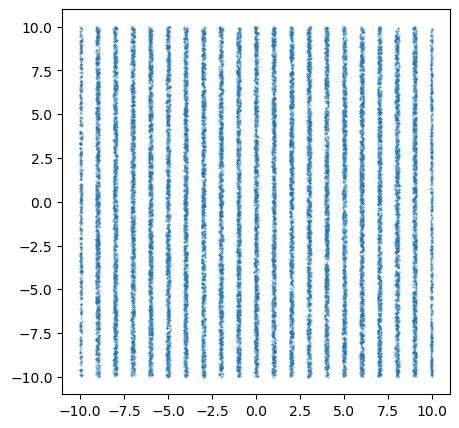

In [9]:
graph(vertical_lines1, x=10,y=10)

In [10]:
def vertical_lines2(x,y):
    if x % 1 <= 0.25 or x % (-1) >= -0.25: 
        res = 1
    else:
        res = 0
    return res  

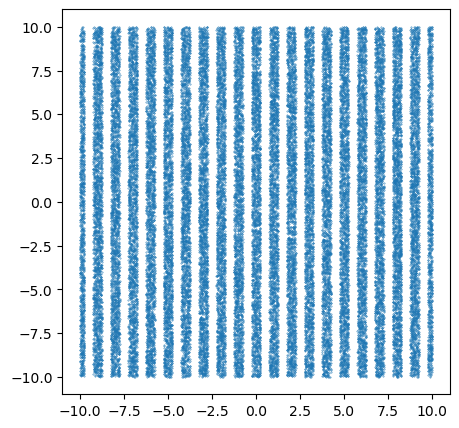

In [11]:
graph(vertical_lines2, x=10,y=10)

## In what follows, pay attention to the change in window_size and which version of vertical_lines I use...
I find that a smaller window leads outliers in the homology, while larger window sizes make the homology very unclear. This is especially true with the first version of vertical_lines. 

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


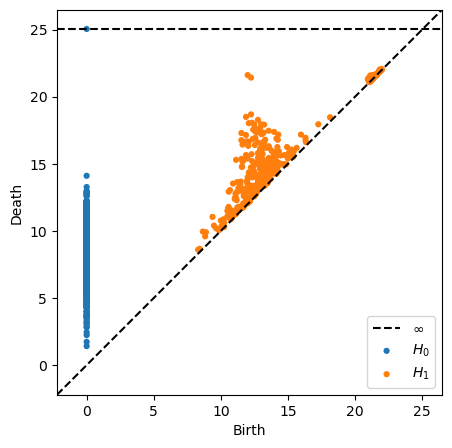

In [12]:
# vertical_lines1, window_size = 2 
output = pipeline(vertical_lines1, num_pixels = 40, window_size = 2, n_isos = 1000, x_translate = 100, y_translate = 100, maxdim = 1, coeff = 2)
plot_dgms(output)

there seems to be two homology classes in dimension 1

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


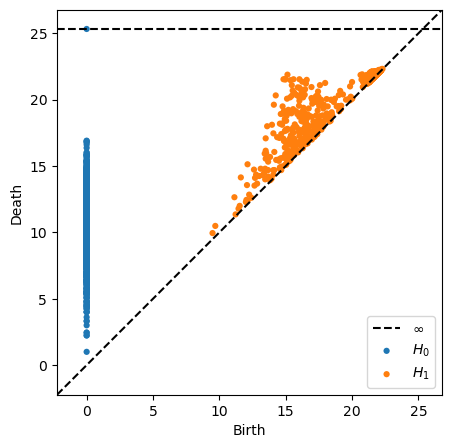

In [13]:
# vertical_lines1, window_size = 5
output = pipeline(vertical_lines1, num_pixels = 40, window_size = 5, n_isos = 1000, x_translate = 100, y_translate = 100, maxdim = 1, coeff = 2)
plot_dgms(output)

increasing the window_size makes all H1 classes look like noise

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


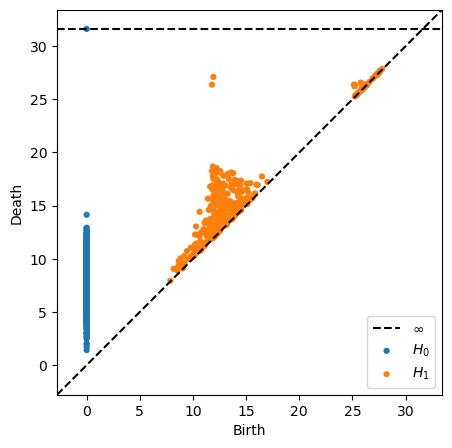

In [14]:
# vertical_lines2, window_size = 2 
output = pipeline(vertical_lines2, num_pixels = 40, window_size = 2, n_isos = 1000, x_translate = 100, y_translate = 100, maxdim = 1, coeff = 2)
plot_dgms(output)

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


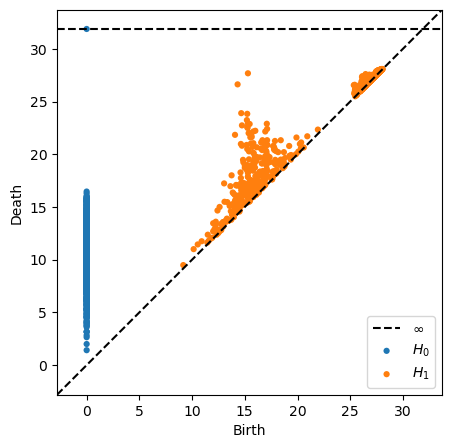

In [15]:
# vertical_lines2, window_size = 5
output = pipeline(vertical_lines2, num_pixels = 40, window_size = 5, n_isos = 1000, x_translate = 100, y_translate = 100, maxdim = 1, coeff = 2)
plot_dgms(output)

there is more flexibility in window size when working with vertical_lines2 instead of vertical_lines1

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


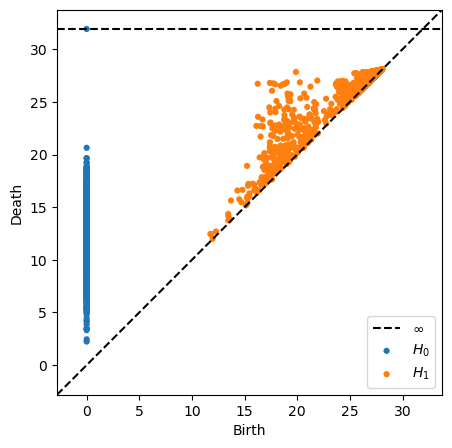

In [16]:
# vertical_lines2, window_size = 10
output = pipeline(vertical_lines2, num_pixels = 40, window_size = 10, n_isos = 1000, x_translate = 100, y_translate = 100, maxdim = 1, coeff = 2)
plot_dgms(output)

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


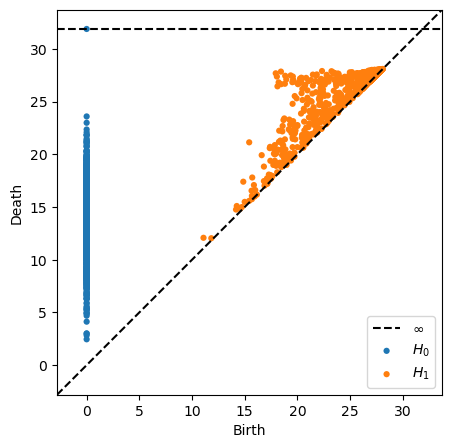

In [17]:
# vertical_lines2, window_size = 15 
output = pipeline(vertical_lines2, num_pixels = 40, window_size = 15, n_isos = 1000, x_translate = 100, y_translate = 100, maxdim = 1, coeff = 2)
plot_dgms(output)

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


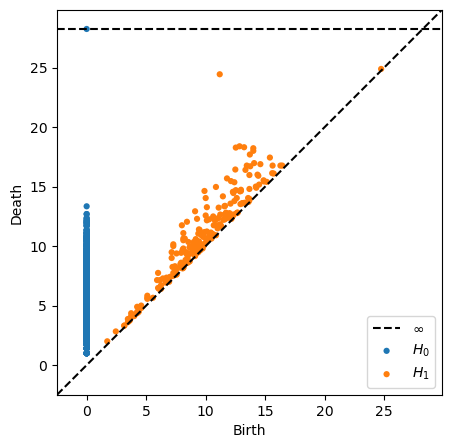

In [18]:
# example of too small of a window with vertical_lines1 -- one of the H1 classes disappears
output = pipeline(vertical_lines1, num_pixels = 40, window_size = .5, n_isos = 1000, x_translate = 100, y_translate = 100, maxdim = 1, coeff = 2)
plot_dgms(output)

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


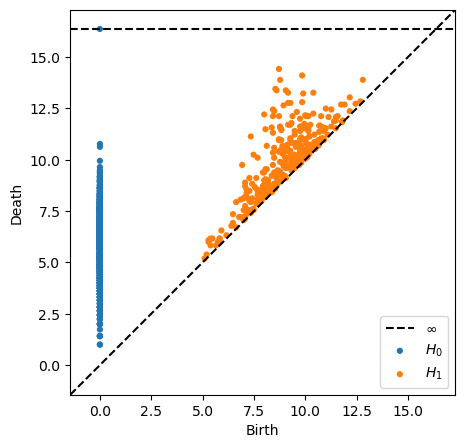

In [19]:
# too small of a window is even worse in the case of vertical_lines2
output = pipeline(vertical_lines2, num_pixels = 40, window_size = .5, n_isos = 1000, x_translate = 100, y_translate = 100, maxdim = 1, coeff = 2)
plot_dgms(output)

**The following 3 cells show that the reason that smaller windows are better for computing homology does not seem to have to do with the number of pixels in our window that take on a value of 1 ("black") instead of 0**

In [20]:
pixels = get_pixels(40,2)
colors1 = get_colors(pixels, vertical_lines1)
colors2 = get_colors(pixels, vertical_lines2)
total_ones1 = 0
total_ones2 = 0
for i in range(len(colors1)):
    if colors1[i] == 1:
        total_ones1 += 1
    if colors2[i] == 1:
        total_ones2 += 1
print(total_ones1, total_ones2)

320 800


In [21]:
pixels = get_pixels(40,10)
colors11 = get_colors(pixels, vertical_lines1)
colors21 = get_colors(pixels, vertical_lines2)
total_ones1 = 0
total_ones2 = 0
for i in range(len(colors1)):
    if colors11[i] == 1:
        total_ones1 += 1
    if colors21[i] == 1:
        total_ones2 += 1
print(total_ones1, total_ones2)

320 800


In [22]:
pixels = get_pixels(40,15)
colors11 = get_colors(pixels, vertical_lines1)
colors21 = get_colors(pixels, vertical_lines2)
total_ones1 = 0
total_ones2 = 0
for i in range(len(colors1)):
    if colors11[i] == 1:
        total_ones1 += 1
    if colors21[i] == 1:
        total_ones2 += 1
print(total_ones1, total_ones2)

240 720


**The following four cells indicate that changing the x_translate and y_translate variables (how far we allow our isometries to translate the image) don't have much of an impact on the clarity of the homology -- still seems to be mostly dependent on the window size**

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


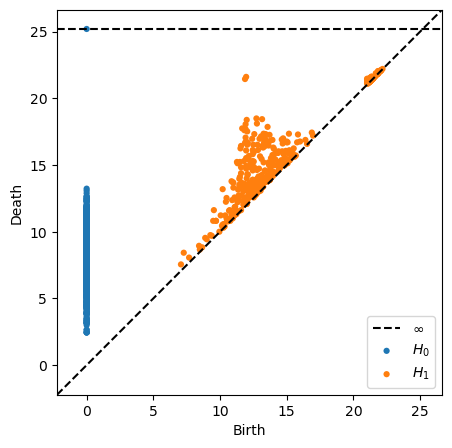

In [23]:
output = pipeline(vertical_lines1, num_pixels = 40, window_size = 2, n_isos = 1000, x_translate = 10, y_translate = 10, maxdim = 1, coeff = 2)
plot_dgms(output)

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


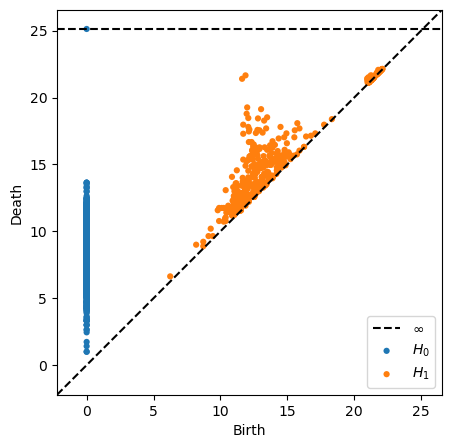

In [24]:
output = pipeline(vertical_lines1, num_pixels = 40, window_size = 2, n_isos = 1000, x_translate = 1000, y_translate = 1000, maxdim = 1, coeff = 2)
plot_dgms(output)

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


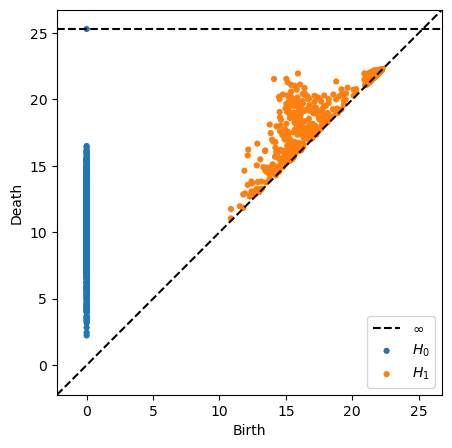

In [25]:
output = pipeline(vertical_lines1, num_pixels = 40, window_size = 5, n_isos = 1000, x_translate = 10, y_translate = 10, maxdim = 1, coeff = 2)
plot_dgms(output)

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


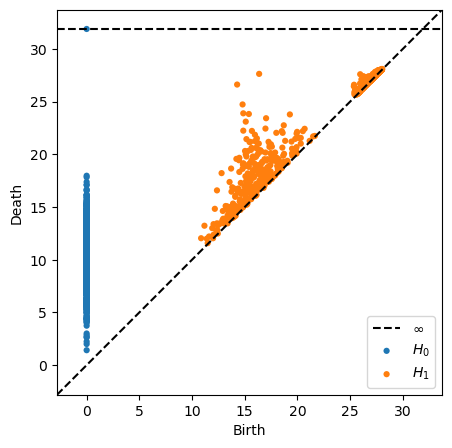

In [27]:
output = pipeline(vertical_lines2, num_pixels = 40, window_size = 5, n_isos = 1000, x_translate = 1000, y_translate = 1000, maxdim = 1, coeff = 2)
plot_dgms(output)